In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sub=pd.read_csv("gender_submission.csv")

In [9]:
print(train.shape)
print(test.shape)
print(train.info())
print(train.describe())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.0

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

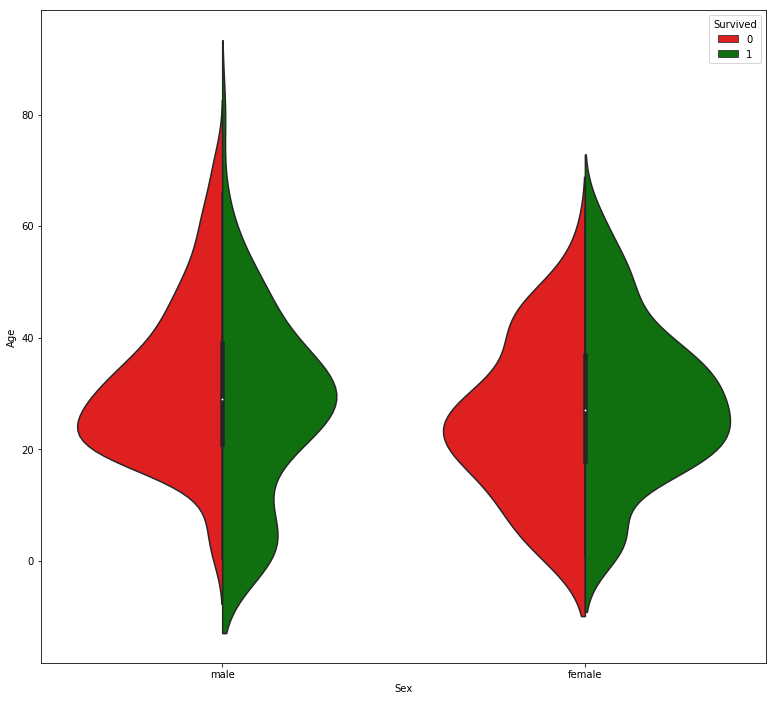

In [23]:
fig=plt.figure(figsize=(13,12))
sns.violinplot(x='Sex',y='Age',
               hue='Survived', data=train,
               split=True, # 사망 생존을 하나로 만든다.
               palette={0:"r", 1:"g"}
               );

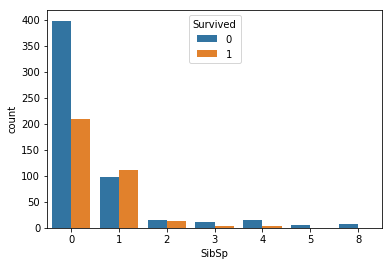

In [25]:
sns.countplot(x="SibSp", hue="Survived", data=train)

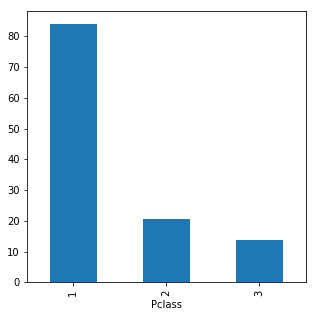

In [56]:
ax=plt.subplot()
b=train.groupby("Pclass").mean()["Fare"]
b.plot(kind='bar', figsize=(5,5), ax=ax)

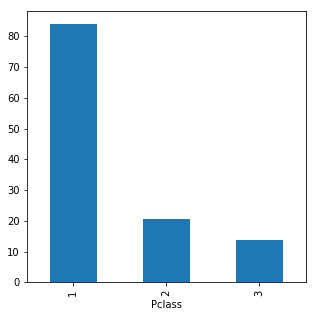

In [59]:
ax=plt.subplot()
np.where((train["Survived"]==1))
c=train.groupby("Pclass").mean()["Fare"]
c.plot(kind='bar', figsize=(5,5), ax=ax)

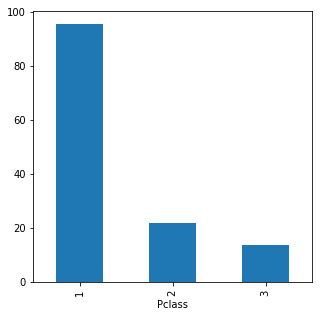

In [60]:
ax=plt.subplot()
tr_a=train[train['Survived']==1]
a=tr_a.groupby(["Pclass"]).mean()["Fare"]
a.plot(kind="bar",figsize=(5,5),ax=ax)

In [0]:

#family = np.where((df['SibSp'] + df['Parch']) >= 1 , 'Has Family', 'No Family')
#df.groupby(family)['Survived'].mean()

family=np.where((train['SibSp']+train))

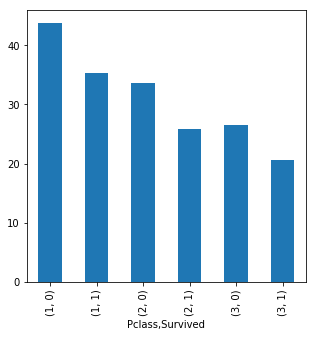

In [42]:
ax=plt.subplot()
a=train.groupby(["Pclass","Survived"]).mean()["Age"]
a.plot(kind='bar',figsize=(5,5),ax=ax)

In [53]:
train['Age']=train['Age'].fillna(-0.5)
test['Age']=train['Age'].fillna(-0.5)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       714 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [0]:
#나이대별 구분
bins=[-1,0,5,12,18,np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student']

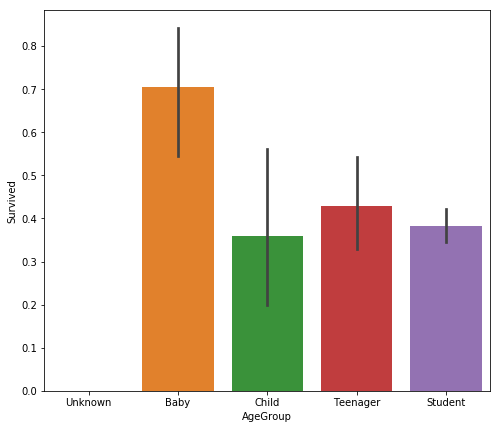

In [51]:
train['AgeGroup']=pd.cut(train['Age'],bins,labels=labels)
train['AgeGroup'].head()

#draw a bar plot of Age vs. survival
fig=plt.figure(figsize=(8,7))
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [0]:
# Cabin이 공백이냐 아니냐
train['CabinBool']=(train['Cabin'].notnull().astype("int"))
test['CabinBool']=(test['Cabin'].notnull().astype("int"))

In [62]:
# R-table(범주형의 빈도수를)
train['CabinBool'].value_counts()

0    687
1    204
Name: CabinBool, dtype: int64

In [71]:
# Cabin이 빼고 시작하겠다.
train.drop(["Cabin"], axis=1, Inplace=True)
train

TypeError: ignored

In [69]:
del train["Ticket"]


KeyError: ignored

In [72]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'CabinBool'],
      dtype='object')

In [73]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [74]:
train.groupby("Embarked").mean()["Fare"]

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [0]:
#replace, extract

In [76]:
train.Name.str.extract('([A-Za-z]+)W.', expand=False)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
      ... 
861    NaN
862    NaN
863    NaN
864    NaN
865    NaN
866    NaN
867    NaN
868    NaN
869    NaN
870    NaN
871    NaN
872    NaN
873    NaN
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879    NaN
880    NaN
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887    NaN
888    NaN
889    NaN
890    NaN
Name: Name, Length: 891, dtype: object

In [0]:
### 이름(Name) 
combine = [train, test]

for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [81]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [82]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Capt          1
Mme           1
Jonkheer      1
Don           1
Lady          1
Sir           1
Countess      1
Name: Title, dtype: int64

In [87]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [88]:
train['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Major', 'Col', 'Mlle',
       'Ms', 'Capt', 'Mme', 'Jonkheer', 'Don', 'Lady', 'Sir', 'Countess'],
      dtype='object')

In [90]:
for dataset in combine:
  dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Don'],'Rare')
  dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
  dataset['Title']=dataset['Title'].replace('Mile','Miss')
  dataset['Title']=dataset['Title'].replace('Ms','Miss')  
  dataset['Title']=dataset['Title'].replace('Mme','Mrs')
train['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare', 'Mlle', 'Royal'], dtype='object')

In [0]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

In [0]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}